### Imports

In [78]:
import numpy as np
import matplotlib.pyplot as plt

### Function to generate a vector with randomized noise

In [79]:
def generate_vector(signal_mean, noise_variance, length=10240):
    signal = np.ones(length) * signal_mean
    noise = np.random.normal(0, np.sqrt(noise_variance), length)
    vector = signal + noise
    return vector

### Function to calculate SNR

In [80]:
def calculate_snr(signal, noise):
    return 10 * np.log10(np.abs(np.mean(signal) / np.std(noise)))

### Function to perform binning and calculate SNR for each binning level

In [81]:
def perform_binning_and_snr(vector, binning_factor):
    binned_vector = vector.reshape(-1, binning_factor).mean(axis=1)
    noise = vector - np.repeat(binned_vector, binning_factor)
    snr = calculate_snr(vector, noise)
    return snr

### Parameters

In [82]:
signal_mean = 100.0
noise_variances = [5.0, 50.0, 500.0]  # Different noise levels
num_replications = 25
binning_factors = [2, 4, 8, 16, 32, 64, 128, 256]

# Results storage
snr_results = np.zeros((len(binning_factors), len(noise_variances), num_replications))

### Main Loop

In [83]:
for rep in range(num_replications):
    for noise_var_idx, noise_variance in enumerate(noise_variances):
        vector = generate_vector(signal_mean, noise_variance)
        for binning_idx, binning_factor in enumerate(binning_factors):
            snr = perform_binning_and_snr(vector, binning_factor)
            snr_results[binning_idx, noise_var_idx, rep] = snr

### Plot

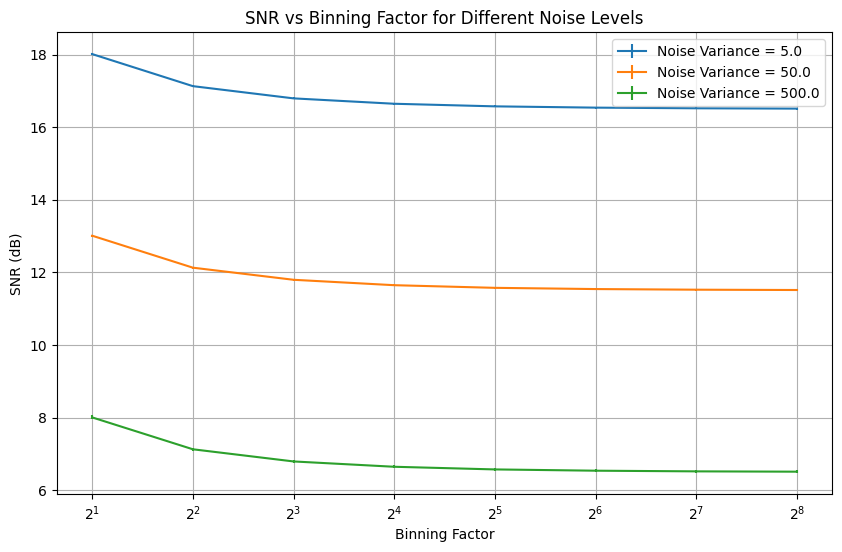

In [92]:
mean_snr = np.mean(snr_results, axis=2)
std_snr = np.std(snr_results, axis=2)

# Plotting
plt.figure(figsize=(10, 6))
for noise_var_idx, noise_variance in enumerate(noise_variances):
    plt.errorbar(binning_factors, mean_snr[:, noise_var_idx], yerr=std_snr[:, noise_var_idx],
                 label=f'Noise Variance = {noise_variance}')

plt.xscale('log', base=2)
plt.xlabel('Binning Factor')
plt.ylabel('SNR (dB)')
plt.title('SNR vs Binning Factor for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()